# Redes Convolucionales en visión por computadoras

## Trabajo Final: Analizando el Amazonas desde el espacio

En este trabajo, utilizaremos imágenes satelitales del Amazonas para entrenar un modelo de Deep Learning que sea capaz de darnos información acerca del contenido de las mismas.

### Imágenes

Trabajaremos con más de 40.000 imágenes satelitales en RGB donde cada píxel representa un área de 3.7 metros. Los datos provienen de los satélites Flock 2 de la compañía Planet, recolectados entre el 1 de Enero de 2016 y el 1 de Febrero de 2017. Todas las escenas provienen de la cuenca del Amazonas que incluye Brasil, Perú, Uruguay, Colombia, Venezuela, Guyana, Bolivia y Ecuador.

### Etiquetas

Las clases a predecir para cada imágen representan un conjunto de fenómenos de interés que se desean analizar en el Amazonas. Estas etiquetas pueden distribuirse en tres grupos:

- Condiciones atmosféricas
- Fenómenos comunes de cobertura/uso de suelo
- Fenómenos raros de cobertura/uso de suelo

Cada imágen tendrá al menos una, y potencialmente, más de una etiqueta del tipo de condiciones atmosféricas. Así como también cero o varias etiquetas del tipo de fenómenos comunes o raros de cobertura/uso de suelo. Aquellas imágenes etiquetadas como "cloudy" (nublado), no deberían tener ninguna otra anotación, aunque pueden haber errores de anotación.

Puede ocurrir que en muchas imágenes no se haya taggeado todos los fenómenos observables, como así también puede que haya etiquetas incorrectas. El poder trabajar y solucionar problemas relacionados con datos ruidosos será parte del desafío.

![chips.jpg](attachment:chips.jpg)
*Ejemplo de imágenes y sus etiquetas*

Trabajaremos con un total de 17 etiquetas posibles, descritas a continuación:

- **Cloudy:** Imagen completamente nublada que no permite obtener observaciones adicionales.
- **Partly Cloudy:** Imagen parcialmente nublada.
- **Clear:** Imagen sin nubes.
- **Haze:** Imagen con neblina.
- **Primary (rainforest):** Presencia de bosque "virgen" o áreas con alta densidad de vegetación.
- **Water:** Presencia de ríos, embalses o lagos.
- **Habitation:** Presencia de casas o edificios.
- **Agriculture:** Porciones de tierra sin árboles siendo utilizadas para la agricultura.
- **Road:** Caminos o rutas.
- **Cultivation:** Es un subconjunto de Agriculture que se refiere a pequeñas granjas siendo explotadas por una persona o familia como medio de supervivencia.
- **Bare Ground:** Áreas sin presencia de árboles por causas naturales y no como resultado de la actividad humana.
- **Slash and Burn:** Áreas que han sido incendiadas recientemente.
- **Selective Logging:** Zonas de tala selectiva de especies de árboles de alto valor.
- **Blooming:** Es un fenómeno natural donde ciertas especies de árboles, eclosionan, dan frutos y florecen para aumentar las chances de polinización cruzada.
- **Conventional Mining:** Zona con presencia de minería legal a larga escala.
- **"Artisinal" Mining:** Operaciones de minería a baja escala, usualmente ilegales.
- **Blow Down:** Fenómeno natural que ocurre cuando el aire frío y seco de los Andes se asienta sobre el aire cálido y húmedo en la selva. Estos fuertes vientos derriban los árboles más grandes de la selva tropical, y las áreas abiertas resultantes son visibles desde el espacio.

### Aclaraciones finales

Tenga en cuenta que este no se trata de un problema de multi-class classification, sino un problema de [multi-label classification](https://en.wikipedia.org/wiki/Multi-label_classification), dónde para cada imágen se puede predecir mas de una categoría o etiqueta.


## Instalación de librerías

Si desea utilizar Google Colab, recomiendo ejecutar este comando para actualizar e instalar la versión 2.0 de `tensorflow-gpu` (la versión instalada por defecto de tensorflow sólo corre en CPU).

In [0]:
!pip uninstall tensorflow && pip install -U tensorflow-gpu==2.0.0 keras==2.3.1

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 378kB 44.3MB/s 
     |████████████████████████████████| 3.8MB 36.7MB/s 
     |████████████████████████████████| 450kB 41.5MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
ERROR: fancyimpute 0.4.3 requires tensorflow, which is not installed.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.

## Obtención de datos

Para descargar las imágenes y sus correspondientes etiquetas, puede ejecutar los siguiente comandos directamente desde el notebook.

In [0]:
# Descargar dataset de imágenes desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM" -O 'train-jpg.tar' && rm -rf /tmp/cookies.txt

--2019-12-15 17:47:33--  https://docs.google.com/uc?export=download&confirm=ZUae&id=1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM
Resolving docs.google.com (docs.google.com)... 172.217.203.100, 172.217.203.139, 172.217.203.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pfmsnodd2h762dhjtromecgsbo4gt37r/1576425600000/12900783405973182389/*/1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM?e=download [following]
--2019-12-15 17:47:33--  https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pfmsnodd2h762dhjtromecgsbo4gt37r/1576425600000/12900783405973182389/*/1--zzWhWfDnSZMtIcUfMyc10ZZPH3ZdnM?e=download
Resolving doc-08-2s-docs.googleusercontent.com (doc-08-2s-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-08-2s-docs.googleuserconten

In [0]:
# Extraemos las imágenes
!tar -xvf train-jpg.tar

train-jpg/
train-jpg/train_21777.jpg
train-jpg/train_34567.jpg
train-jpg/train_7212.jpg
train-jpg/train_11485.jpg
train-jpg/train_14111.jpg
train-jpg/train_8634.jpg
train-jpg/train_27649.jpg
train-jpg/train_8459.jpg
train-jpg/train_12520.jpg
train-jpg/train_25962.jpg
train-jpg/train_14764.jpg
train-jpg/train_17626.jpg
train-jpg/train_25677.jpg
train-jpg/train_9660.jpg
train-jpg/train_1366.jpg
train-jpg/train_26122.jpg
train-jpg/train_24548.jpg
train-jpg/train_17415.jpg
train-jpg/train_25901.jpg
train-jpg/train_23389.jpg
train-jpg/train_25095.jpg
train-jpg/train_12922.jpg
train-jpg/train_19885.jpg
train-jpg/train_37550.jpg
train-jpg/train_21305.jpg
train-jpg/train_40436.jpg
train-jpg/train_31247.jpg
train-jpg/train_1837.jpg
train-jpg/train_6289.jpg
train-jpg/train_36691.jpg
train-jpg/train_16062.jpg
train-jpg/train_28673.jpg
train-jpg/train_22394.jpg
train-jpg/train_14346.jpg
train-jpg/train_13177.jpg
train-jpg/train_12481.jpg
train-jpg/train_3923.jpg
train-jpg/train_36787.jpg
train-jpg

In [0]:
# Descargar etiquetas desde Google Drive
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UB3LTf73QrXggGQqzUCLjntxmfA90aDb' -O 'train-jpg-labels.pkl'

--2019-12-15 17:41:24--  https://docs.google.com/uc?export=download&id=1UB3LTf73QrXggGQqzUCLjntxmfA90aDb
Resolving docs.google.com (docs.google.com)... 172.217.203.100, 172.217.203.139, 172.217.203.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9em4u2qg22tvbcd6le2pt5u7prjtrj3v/1576425600000/12900783405973182389/*/1UB3LTf73QrXggGQqzUCLjntxmfA90aDb?e=download [following]
--2019-12-15 17:41:25--  https://doc-08-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9em4u2qg22tvbcd6le2pt5u7prjtrj3v/1576425600000/12900783405973182389/*/1UB3LTf73QrXggGQqzUCLjntxmfA90aDb?e=download
Resolving doc-08-2s-docs.googleusercontent.com (doc-08-2s-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-08-2s-docs.googleusercontent.com (doc-08

## Librerias a utilizar

Es obligatorio el uso de `Keras` y `tensorflow` para la creación y entrenamiento de su modelo de Deep Learning.

In [0]:
import warnings

from IPython.display import SVG
from keras import regularizers, optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.utils import plot_model, to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

warnings.filterwarnings('ignore')
%matplotlib inline
RANDOM_STATE = 14

## Exploración y análisis

Utilice esta sección para explorar las imágenes y sus etiquetas asociadas. Sugerencias:

- Analice la distribución de los datos.
    - ¿Está el dataset balanceado?
    - ¿Cuál es el tamaño de las imágenes?
- Analice la correlación entre etiquetas.
- Visualice imágenes y relaciones patrones presentes en cada una.

**Ayuda:** Para cargar las etiquetas recomiendo utilizar la función [read_pickle](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_pickle.html) de la librería `Pandas`.

In [0]:
labels = pd.read_pickle("train-jpg-labels.pkl")
labels.head()

,image_name,tags
0,train-jpg/train_0.jpg,"[haze, primary]"
1,train-jpg/train_1.jpg,"[agriculture, clear, primary, water]"
2,train-jpg/train_2.jpg,"[clear, primary]"
3,train-jpg/train_3.jpg,"[clear, primary]"
4,train-jpg/train_4.jpg,"[agriculture, clear, habitation, primary, road]"


In [220]:
tags = []
for tag in labels.tags:
  tags.extend(tag)
tag_ctr = Counter(tags)
tags_ctr = pd.DataFrame.from_dict(tag_ctr, orient="index", columns=["counter"])
display(tags_ctr.sort_values("counter", ascending=False))
labels = list(tag_ctr.keys())
label_length = len(labels)

,counter
primary,142758
agriculture,117560
partly_cloudy,112506
cultivation,109792
clear,28431
road,8071
water,7411
habitation,3660
haze,2697
cloudy,2089


In [0]:
labels.isnull().sum(axis = 0)

image_name    0
tags          0
dtype: int64

No hay valores NaN

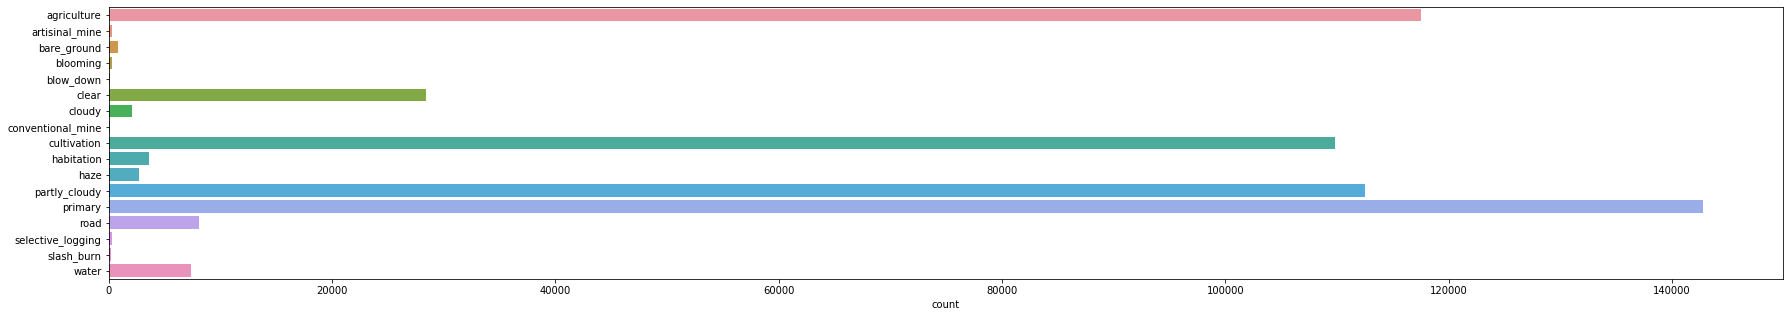

In [136]:
plt.figure(figsize=(30, 5))
sns.countplot(y=sorted(tags))

In [0]:
mpimg.imread('train-jpg/train_0.jpg').shape

(256, 256, 4)

In [0]:
# imgplot_full = plt.imshow(mpimg.imread('train-jpg/train_1.jpg')[:,:,:])
# plt.show()
# imgplot_ch0 = plt.imshow(mpimg.imread('train-jpg/train_1.jpg')[:,:,0])
# plt.show()
# imgplot_ch1 = plt.imshow(mpimg.imread('train-jpg/train_1.jpg')[:,:,1])
# plt.show()
# imgplot_ch2 = plt.imshow(mpimg.imread('train-jpg/train_1.jpg')[:,:,2])
# plt.show()
# imgplot_ch3 = plt.imshow(mpimg.imread('train-jpg/train_1.jpg')[:,:,3])
# plt.show()

Las imagenes son de 256x256 y son de 4 canales: RGB (3) y Alpha (1), comunmente llamado RGBA

## Conjunto de entrenamiento

En base al análisis anterior, decida como separará sus datos en conjuntos de entrenamiento y testing.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(labels.image_name, labels.tags, test_size=0.2, random_state=5)

In [0]:
y_train.head()

5789     [clear, primary, agriculture, cultivation, par...
29373    [agriculture, clear, habitation, road, agricul...
32857    [clear, primary, agriculture, cultivation, par...
34094    [agriculture, clear, primary, road, water, agr...
32260    [agriculture, clear, primary, water, agricultu...
Name: tags, dtype: object

In [0]:
train_tags = []
for tag in y_train:
  train_tags.extend(tag)
train_tag_ctr = Counter(train_tags)
train_tags_ctr = pd.DataFrame.from_dict(train_tag_ctr, orient="index", columns=["counter"])
display(train_tags_ctr.sort_values("counter", ascending=False))

,counter
primary,114285
agriculture,94175
partly_cloudy,90194
cultivation,87936
clear,22655
road,6452
water,5984
habitation,2908
haze,2141
cloudy,1715


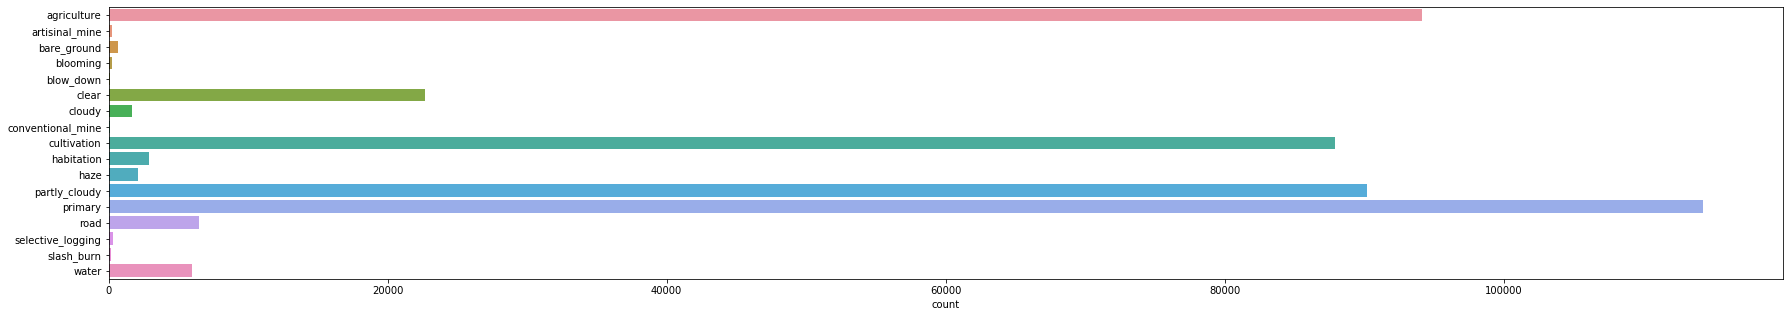

In [138]:
plt.figure(figsize=(30, 5))
sns.countplot(y=sorted(train_tags))

In [139]:
test_tags = []
for tag in y_train:
  test_tags.extend(tag)
test_tag_ctr = Counter(test_tags)
test_tags_ctr = pd.DataFrame.from_dict(test_tag_ctr, orient="index", columns=["counter"])
display(test_tags_ctr.sort_values("counter", ascending=False))

,counter
primary,114285
agriculture,94175
partly_cloudy,90194
cultivation,87936
clear,22655
road,6452
water,5984
habitation,2908
haze,2141
cloudy,1715


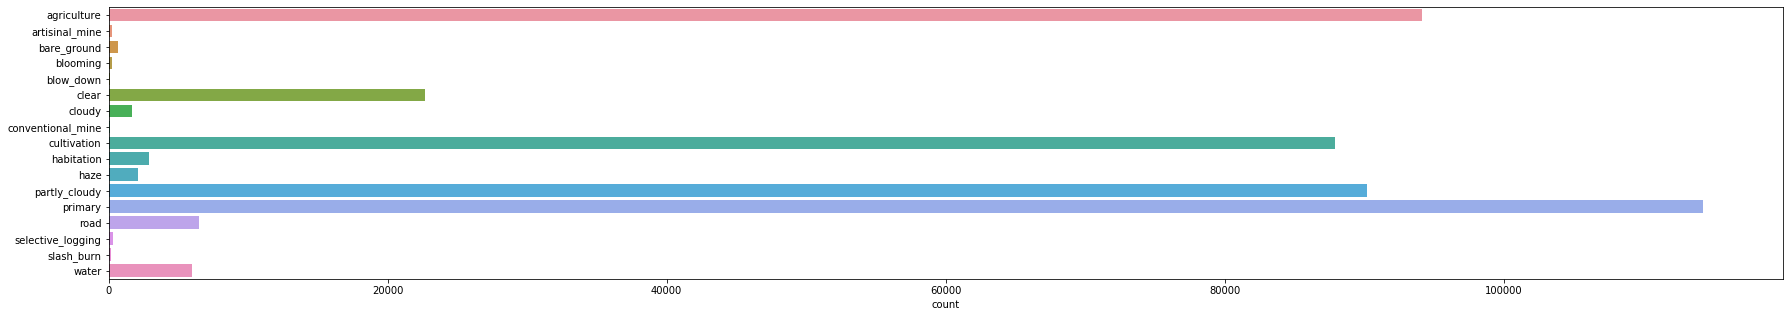

In [140]:
plt.figure(figsize=(30, 5))
sns.countplot(y=sorted(test_tags))

## Data Augmentation

Proponga algún de pre-procesamiento y aumentado de datos, visualice los resultados del método propuesto. Puede experimentar y elegir el que mejor funcione en sus entrenamientos.

**Ayuda:** Al tener sus anotaciones en formato csv, lo mas sensillo sería utilizar el método [flow_from_dataframe](https://keras.io/preprocessing/image/#flow_from_dataframe) de la clase `ImageDataGenerator` de `Keras`.

In [227]:
train_df = pd.DataFrame([X_train, y_train]).T
train_df["index"] = list(train_df.index)

tokenizer = Tokenizer()
label_seq = tokenizer.texts_to_sequences(y_train)
labels = [to_categorical(label, num_classes=label_length, dtype='float32').sum(axis=0)[1:] for label in label_seq]
 
# image_paths=[img_folder+img+".png" for img in image_name]

train_df.head()

NameError: ignored

In [0]:
datagen = ImageDataGenerator(rescale=1./255., rotation_range=45, brightness_range=[-1.0, 1.0], horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [181]:
train_generator = datagen.flow_from_dataframe(dataframe=train_df, 
                                              y_col="index",
                                              x_col="image_name", 
                                              directory=".", 
                                              target_size=(256, 256), 
                                              color_mode='rgba', 
                                              classes=None, 
                                              class_mode="raw",
                                              batch_size=32,
                                              shuffle=True
)

Found 32383 validated image filenames.


In [182]:
test_df = pd.DataFrame([X_test, y_test]).T
test_df["index"] = list(test_df.index)
test_df.head()

,image_name,tags,index
35665,train-jpg/train_35665.jpg,"[cloudy, agriculture, cultivation, partly_clou...",35665
1512,train-jpg/train_1512.jpg,"[partly_cloudy, primary, agriculture, cultivat...",1512
31719,train-jpg/train_31719.jpg,"[agriculture, partly_cloudy, primary, water, a...",31719
16004,train-jpg/train_16004.jpg,"[agriculture, partly_cloudy, primary, road, wa...",16004
9301,train-jpg/train_9301.jpg,"[clear, primary, agriculture, cultivation, par...",9301


In [183]:
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df, 
                                              y_col="index",
                                              x_col="image_name", 
                                              directory=".", 
                                              target_size=(256, 256), 
                                              color_mode='rgba', 
                                              classes=None, 
                                              class_mode="raw",
                                              batch_size=32,
                                              shuffle=True
)

Found 8096 validated image filenames.


In [0]:
# Fit a MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(train_df['tags'])

# The helper function
def multilabel_flow_from_dataframe(data_generator, mlb):
    for x, y in data_generator:
        indices = y.astype(np.int).tolist()
        y_multi = mlb.transform(
            df.iloc[indices]['tags']#.values.tolist()
        )
        yield x, y_multi

In [0]:
multilabel_generator_train = multilabel_flow_from_dataframe(train_generator, mlb)
multilabel_generator_test = multilabel_flow_from_dataframe(test_generator, mlb)

## Elección de modelo

Elija un modelo de red convolucional para entrenar sobre sus datos. Puede armar su propia red convolucional de cero o utilizar una de las provistas por `Keras` en [Applications](https://keras.io/applications/).

Piense como debería ser la capa de clasificación de su modelo y la función de costo a utilizar durante el entrenamiento al tratarse de un problema del tipo multi-label classification.

### Activation Function
- The final score for each class should be independent of each other. Thus we can not apply softmax activation, because softmax converts the score into probabilities taking other scores into consideration.
- The reason for the final score to be independent is obvious. If a movie genre is action, then it should not affect if the movie is thriller too.
- We use the sigmoid activation function on the final layer. Sigmoid converts each score of the final node between 0 to 1 independent of what the other scores are.
- If the score for some class is more than 0.5, the data is classified into that class. And there could be multiple classes having a score of more than 0.5 independently. Thus the data could be classified into multiple classes. Following is code snippet for sigmoid activation.

In [211]:
model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=5, strides=2, activation='relu', input_shape=(256, 256, 4)))
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu'))       

model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(len(tag_ctr.keys()), activation='sigmoid'))   # Final Layer using Softmax

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 126, 126, 32)      3232      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
dense_16 (Dense)             (None, 124, 124, 128)     8320      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1968128)           0         
_________________________________________________________________
dense_17 (Dense)             (None, 17)                33458193  
Total params: 33,488,241
Trainable params: 33,488,241
Non-trainable params: 0
_________________________________________________________________


In [217]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(256,256,4)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(tag_ctr.keys()), activation='sigmoid'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 256, 256, 32)      1184      
_________________________________________________________________
activation_6 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 254, 254, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 127, 127, 64)    

## Entrenamiento

Entrene y muestre los resultados obtenidos en cada epoch para con su modelo.

In [219]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

model.fit_generator(generator=train_generator, 
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=50,
                    validation_data=test_generator,
                    validation_steps=STEP_SIZE_TEST,
                    use_multiprocessing=True)

Epoch 1/50


ValueError: ignored

## Evaluación

Muestre debajo los resultados del modelo en su conjunto de testing. Elija las métricas apropiadas para este tipo de problema.